<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ANALYSIS-AND-INSIGHTS" data-toc-modified-id="ANALYSIS-AND-INSIGHTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ANALYSIS AND INSIGHTS</a></span><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set up</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#ANALYSIS" data-toc-modified-id="ANALYSIS-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ANALYSIS</a></span><ul class="toc-item"><li><span><a href="#Price-analysis" data-toc-modified-id="Price-analysis-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Price analysis</a></span></li><li><span><a href="#Analisis-sobre-la-ocupación" data-toc-modified-id="Analisis-sobre-la-ocupación-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Analisis sobre la ocupación</a></span></li><li><span><a href="#Geographical-analysis-on-a-map" data-toc-modified-id="Geographical-analysis-on-a-map-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Geographical analysis on a map</a></span></li></ul></li></ul></li></ul></div>

# ANALYSIS AND INSIGHTS

## Set up

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy = True
pd.options.display.max_columns = None

## Loading data

In [4]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_ready', con = con)
df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,total_price,occupancy,bedrooms_discrete,accommodates_discrete,beds_discrete,number_of_reviews_discrete,m2,purchase_price,pdi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50,1_one,0 - 2,1,48-744,50,178430.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0,1_one,0 - 2,1,5-48,50,79345.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39,3_three,4 - 16,3 - 23,1-4,90,257355.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68,1_one,0 - 2,1,5-48,50,168945.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4,1_one,0 - 2,1,48-744,50,142975.0,3.200942


## ANALYSIS

### Price analysis

**What is the average price? and the price range? and by districts? and by neighborhoods?**

**What is the ranking of districts and neighborhoods by average rental price? What is the ranking of districts and neighborhoods by average rental price?**

In [5]:
df['total_price'].describe()

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: total_price, dtype: float64

The standard deviation is almost three times the mean, which shows that there is a strong influence of outliers. 
The mean is also very high, almost 150 euros per night, the mean is not a reliable measure of centrality in this case. Therefore we will use the median, which is equivalent to 70 euros per night in a room in Madrid.

In [6]:
df['total_price'].median()

70.0

In [7]:
df.groupby('distrito')['total_price'].median().sort_values(ascending = False)

distrito
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: total_price, dtype: float64

The San Blas data is interesting, let's take a closer look to see what is going on.

In [8]:
df.loc[df['distrito'] == 'San Blas - Canillejas'].sort_values('total_price', ascending = False).head(10)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,total_price,occupancy,bedrooms_discrete,accommodates_discrete,beds_discrete,number_of_reviews_discrete,m2,purchase_price,pdi_sol
9290,9290,9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,9800.0,100,3_three,4 - 16,3 - 23,1-4,90,163233.0,7.532233
9662,9662,9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6300.0,75,2_two,3,2,1-4,70,126959.0,7.439364
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6000.0,0,4_four,4 - 16,3 - 23,1-4,120,217644.0,8.212429
9668,9668,9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,5670.0,100,2_two,4 - 16,2,1-4,70,126959.0,8.391922
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,5.0,8.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4480.0,75,4_four,4 - 16,3 - 23,1-4,150,272055.0,7.714952
9748,9748,9748,34882596,2 rooms near wanda,38951538,San Blas - Canillejas,Arcos,40.41948,-3.61427,Private room,1500,1,2,363,2 rooms near Wanda stadium (20' walking) with ...,f,4,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,2_two,3,3 - 23,1-4,70,126959.0,7.548577
9173,9173,9173,34522997,Beautiful Penthouse next to Wanda Metropolitano,260551569,San Blas - Canillejas,Canillejas,40.43686,-3.61093,Private room,2000,1,1,0,Wonderful penthouse in a lovely duplex next to...,f,4,1.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,100,1_one,3,2,1-4,50,90685.0,8.138310
9831,9831,9831,34933116,FINAL CHAMPIONS LEAGUE MADRID,263232278,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,2000,2,1,365,Near (15 minutes walking) to WANDA STADIUM.<br...,f,5,3.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,3_three,4 - 16,2,1-4,90,163233.0,7.557076
10092,10092,10092,35091283,FINAL CHAMPIONS LEAGUE,264225539,San Blas - Canillejas,Rejas,40.44592,-3.58746,Private room,1000,1,1,180,"Desayuno, comida y cena incluida. Traslados al...",f,6,2.0,6.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,50,2_two,4 - 16,3 - 23,1-4,70,126959.0,10.334061
10404,10404,10404,35251141,Se alquila para final de la champion league,265376740,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,3000,1,1,365,None,f,1,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3000.0,0,2_two,0 - 2,3 - 23,1-4,70,126959.0,8.610212


We see that they are prices in the vicinity of 3,000 - 5,000 euros!

Reading the description we realize that all these prices are defined by the Champions League final, which played liverpool vs totenham in 2019.

Which is an interesting insight: 

**Insight 1: there may be properties with a regular residual value but with high value at specific times due to sporting events or shows**.

Would it make sense to generate a rental product consisting of renting on a "normal" basis at a below-market price on the condition that the tenant vacates the apartment to rent it out "touristically" on designated dates?

In the rest there are no surprises, with districts such as Salamanca, Centro or Chanmartín leading the way.

But for example we see that the average price difference between Retiro and Tetuán is very low.

This leads us to compare the average price per district with the average purchase price also per district.

In [9]:
temporal = df.groupby('distrito')[['total_price', 'purchase_price']].median()
temporal.head()

,total_price,purchase_price
distrito,,
Arganzuela,58.0,142975.0
Barajas,49.5,119315.0
Carabanchel,48.0,74305.0
Centro,76.0,168945.0
Chamartín,74.0,178430.0


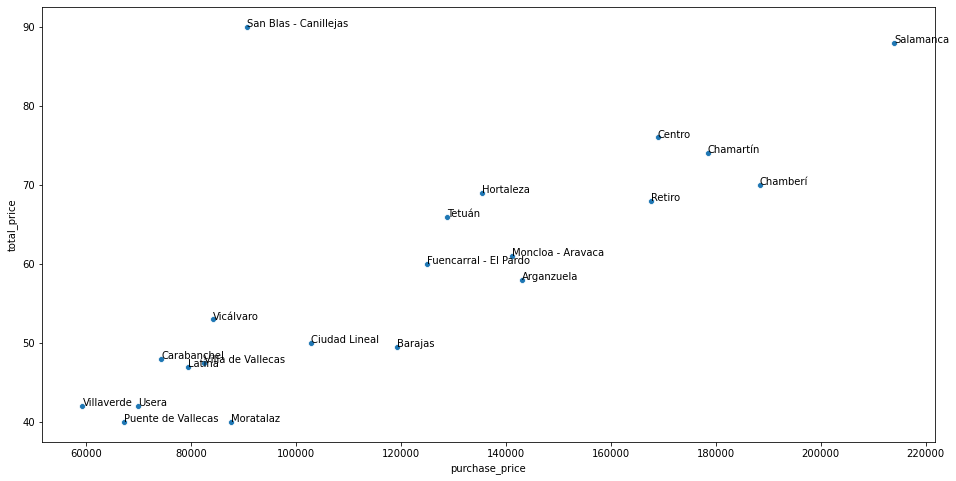

In [10]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temporal, x = 'purchase_price', y = 'total_price' )
for i in range(0, temporal.shape[0]):
    plt.text(temporal['purchase_price'][i], temporal['total_price'][i], temporal.index[i]); 

There is a clear correlation between the purchase price in each district and the price we will be able to charge.

Clearly there are three clusters of low-low, medium-medium and high-high.

And the exception of San Blas we already know why it is.

Therefore, as expected, there is no clear "bargain" at this level.

Let's repeat the analysis at the neighborhood level to see if we can identify something.

In [11]:
temporal = df.groupby('neighbourhood')[['purchase_price', 'total_price']].median()
temporal.head()

,purchase_price,total_price
neighbourhood,,
Abrantes,74305.0,35.5
Acacias,142975.0,53.8
Adelfas,234612.0,54.0
Aeropuerto,119315.0,41.3
Aguilas,79345.0,47.0


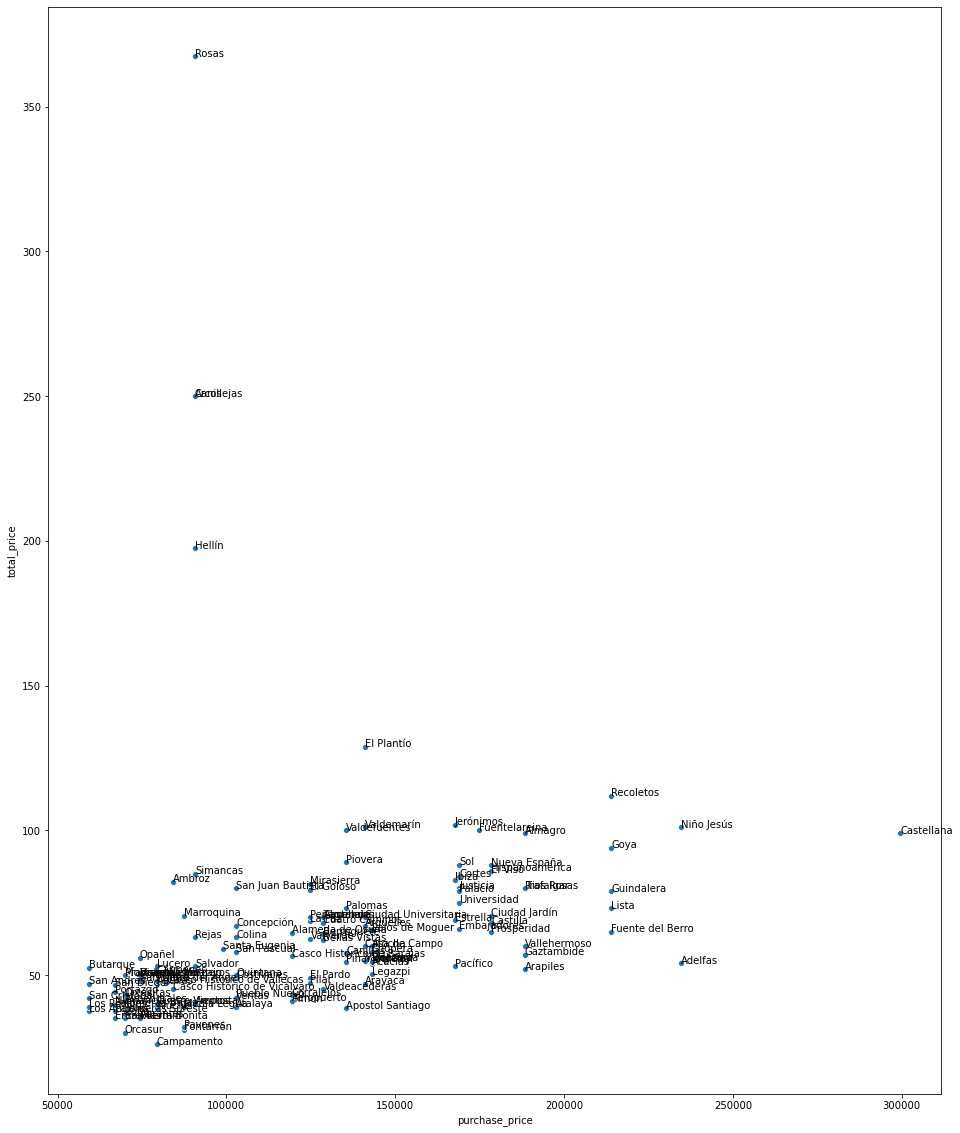

In [12]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temporal, x = 'purchase_price', y = 'total_price');

for i in range(0, temporal.shape[0]):
    plt.text(temporal['purchase_price'][i], temporal['total_price'][i], temporal.index[i])


At this level we already see more things:

* 3 neighborhoods that stand out, possibly all 3 are from San Blas.
* Within each group of low-middle-high we can begin to separate neighborhoods that for the same amount of purchase can maximize the benefit for the market price that have the rents.
    * Low: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Medium: El Plantio, Valdemarín, Valdefuentes.
    * Medium-high: Jerónimos, Fuentela Reina, Fuentela Reina.
    * High: Recoletos
    
**Insight 2: There are certain neighborhoods that apriori can maximize the cost-income ratio and we can also segment it by the type of property quality in which we are interested in investing**.

In [13]:
df.filter(like = 'disc')

,bedrooms_discrete,accommodates_discrete,beds_discrete,number_of_reviews_discrete
0,1_one,0 - 2,1,48-744
1,1_one,0 - 2,1,5-48
2,3_three,4 - 16,3 - 23,1-4
3,1_one,0 - 2,1,5-48
4,1_one,0 - 2,1,48-744
...,...,...,...,...
17705,1_one,0 - 2,1,1-4
17706,1_one,0 - 2,1,1-4
17707,1_one,0 - 2,1,1-4
17708,1_one,0 - 2,1,1-4


In [14]:
metrics = ['total_price', 'purchase_price']
dimensions = ['bedrooms_discrete', 'accommodates_discrete', 'beds_discrete', 'number_of_reviews_discrete']
minicube = df[dimensions + metrics]
minicube

,bedrooms_discrete,accommodates_discrete,beds_discrete,number_of_reviews_discrete,total_price,purchase_price
0,1_one,0 - 2,1,48-744,60.0,178430.0
1,1_one,0 - 2,1,5-48,31.0,79345.0
2,3_three,4 - 16,3 - 23,1-4,50.0,257355.0
3,1_one,0 - 2,1,5-48,92.0,168945.0
4,1_one,0 - 2,1,48-744,26.0,142975.0
...,...,...,...,...,...,...
17705,1_one,0 - 2,1,1-4,29.0,168945.0
17706,1_one,0 - 2,1,1-4,29.0,168945.0
17707,1_one,0 - 2,1,1-4,29.0,168945.0
17708,1_one,0 - 2,1,1-4,29.0,213990.0


In [15]:
minicube_price = minicube.melt(id_vars = ['total_price', 'purchase_price'])
minicube_price

,total_price,purchase_price,variable,value
0,60.0,178430.0,bedrooms_discrete,1_one
1,31.0,79345.0,bedrooms_discrete,1_one
2,50.0,257355.0,bedrooms_discrete,3_three
3,92.0,168945.0,bedrooms_discrete,1_one
4,26.0,142975.0,bedrooms_discrete,1_one
...,...,...,...,...
70835,29.0,168945.0,number_of_reviews_discrete,1-4
70836,29.0,168945.0,number_of_reviews_discrete,1-4
70837,29.0,168945.0,number_of_reviews_discrete,1-4
70838,29.0,213990.0,number_of_reviews_discrete,1-4


In [16]:
minicube_price = minicube_price.groupby(['variable', 'value'])[['total_price','purchase_price']].median()
minicube_price

total_price  purchase_price
variable                   value                               
accommodates_discrete      0 - 2           50.0        168945.0
                           3               86.0        168945.0
                           4 - 16         126.0        236523.0
bedrooms_discrete          1_one           56.0        168945.0
                           2_two          100.0        236523.0
                           3_three        140.0        304101.0
                           4_four         204.0        405468.0
beds_discrete              1               59.0        168945.0
                           2              100.0        236523.0
                           3 - 23         139.0        257355.0
number_of_reviews_discrete 1-4             70.0        168945.0
                           48-744          68.0        168945.0
                           5-48            69.0        168945.0

On the mini-cube we analyze each variable.

In [17]:
minicube_price.loc['bedrooms_discrete']

,total_price,purchase_price
value,,
1_one,56.0,168945.0
2_two,100.0,236523.0
3_three,140.0,304101.0
4_four,204.0,405468.0


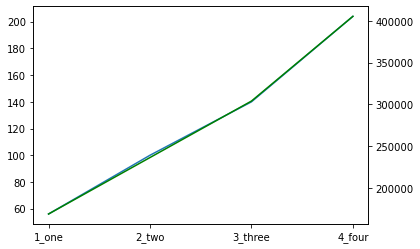

In [18]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['bedrooms_discrete']['total_price'])
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['bedrooms_discrete']['purchase_price'], color = 'g');

As far as the number of rooms is concerned, there is nothing to emphasize.

There is an almost perfect relationship between the purchase price and the total price that can be charged.

Part of this effect may be artificial, since we use the number of rooms to calculate the total price as the purchase price.

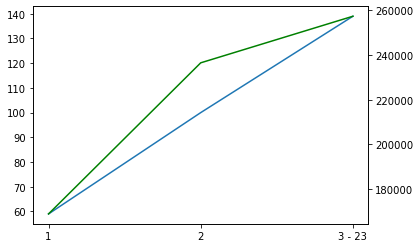

In [19]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['beds_discrete']['total_price'])
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['beds_discrete']['purchase_price'], color = 'g');

Regarding the number of beds, there is a conclusion:

**Insight 3: the number of beds to avoid is 2**. Either we put in one bed or we try to put in as many as possible.

Given that there was no such effect on the number of rooms, could it be that owners are trying to put in many more beds than rooms to maximize revenue?

Let's look at it for example with one-bedroom apartments:

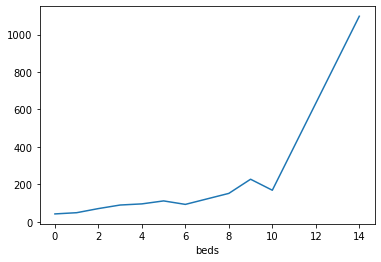

In [20]:
df.loc[df['bedrooms'] == 1].groupby('beds')['total_price'].median().plot();

Indeed there is something here, as it appears that for one-bedroom apartments there are people who are putting up to dozens of beds!

It would be a topic to explore in more detail and discuss with someone who knows the business.

Let's see some examples:

In [21]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)].head(4)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,total_price,occupancy,bedrooms_discrete,accommodates_discrete,beds_discrete,number_of_reviews_discrete,m2,purchase_price,pdi_sol
357,357,357,1044902,Masía el Ferrajón,5751753,Moncloa - Aravaca,Ciudad Universitaria,40.46549,-3.75115,Private room,112,2,1,0,<b>The space</b><br />Masía el Ferrajón featur...,f,16,1.0,14.0,0,NaN,NaN,NaN,4033,Moncloa - Aravaca,1097.6,100,1_one,4 - 16,3 - 23,1-4,50,141155.0,6.767308
605,605,605,2143824,The Hat Madrid - 10 people shared,10940437,Centro,Sol,40.41511,-3.70804,Shared room,24,1,6,364,10 people shared room with shared bathroom. <b...,t,10,1.0,10.0,91,4.57,4.69,4.84,4827,Centro,168.0,0,1_one,4 - 16,3 - 23,48-744,50,168945.0,0.436897
710,710,710,3011110,The Hat Madrid-Compartida 10 pers 2,10940437,Centro,Embajadores,40.41311,-3.70621,Shared room,24,1,6,364,The Hat Madrid es el primer Boutique Hostel de...,t,10,1.0,10.0,28,4.56,4.81,4.93,4827,Centro,168.0,0,1_one,4 - 16,3 - 23,5-48,50,168945.0,0.470155
11848,11848,11848,39600798,Bed in a 10-Bed Dormitory In the Centre of Madrid,304035848,Centro,Justicia,40.42710,-3.69912,Shared room,20,1,13,351,"Low-key, hostel-style setup on a tree-lined st...",f,1,1.0,10.0,2,5.00,5.00,5.00,4827,Centro,140.0,3,1_one,0 - 2,3 - 23,1-4,50,168945.0,1.207701


Let's now analyze by the number of guests they accept.

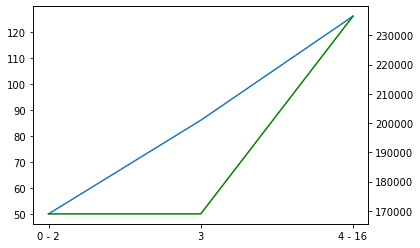

In [22]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['accommodates_discrete']['total_price'])
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['accommodates_discrete']['purchase_price'], color = 'g')



Indeed there is something here, as it appears that for one-bedroom apartments there are people who are putting in up to dozens of beds!

* It would be a topic to explore in more detail and discuss with someone who knows the business.

* Let's take a look at some examples: Let's analyze now by the number of guests they accept.

**Insight 4: the optimal number of guests is at 3, since the price of real estate to accommodate 3 is the same as to accommodate 1 or 2. From 4 the floor needs to be larger and the purchase price increases quite a bit**.

Finally, we are going to analyze the variable that we have constructed of proximity to a point of interest to see if it has an effect on the price of the rooms.

In a real situation we would have constructed many of this type, and repeated the analysis with all of them.

In this case as we have constructed the distance to Puerta del Sol we will evaluate only the districts for which this may be relevant, i.e. the most central ones.

To do this we will first calculate the average distance per district and choose a cut-off point.

In [23]:
df.groupby('distrito')['pdi_sol'].median().sort_values()

distrito
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: pdi_sol, dtype: float64

Due to the knowledge of the city of Madrid and seeing the distances that separate the neighborhoods to the point of interest, we decided to cut in the neighborhood la Latina.

And on that selection we will visualize with a scatter.

In [24]:
selection = df.groupby('distrito')['pdi_sol'].median().sort_values()[0:7].index.to_list()
selection

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

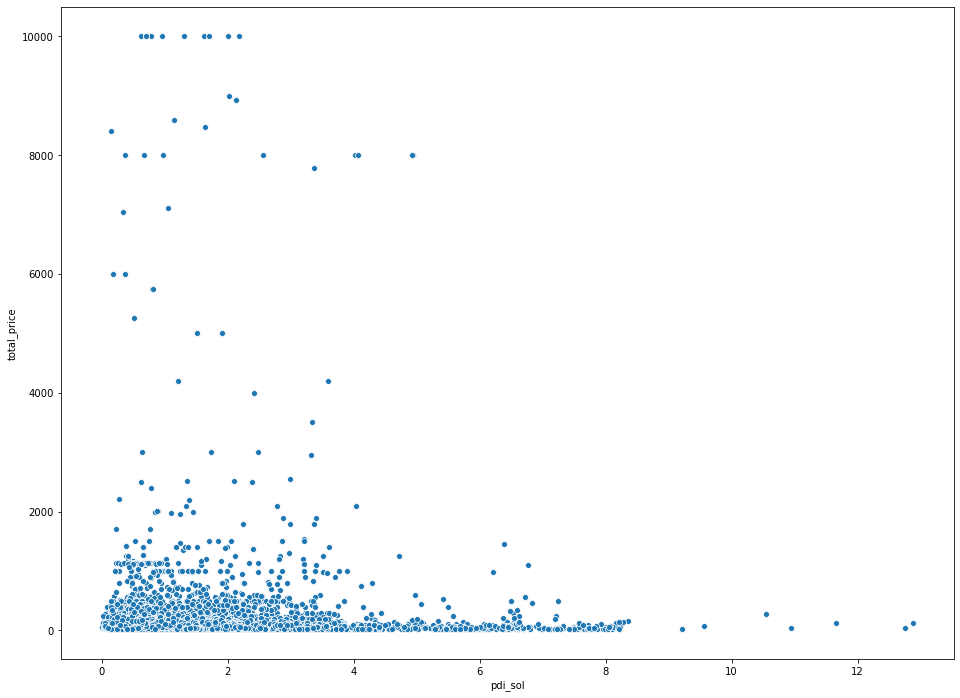

In [25]:
plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df['distrito'].isin(selection)], x = 'pdi_sol', y = 'total_price' );

There does not seem to be as direct a relationship as would be expected between distance from Puerta del Sol and rental price.

**Insight 5: being within the district it seems that the proximity to points of interest does not have as much impact as expected. This opens the door to look for properties that being in a central district are not right next to the POI and therefore hopefully have a lower purchase price**.

DISCLAIMER: This insight is a product of the only distance variable that we created, what should be done in a real situation is to put into play the proximity to other points of tourist interest (not only to the Puerta de Sol), such as soccer stadiums, museums, etc. or proximity to subway stations.

### Analisis sobre la ocupación

### Geographical analysis on a map

In [26]:
import folium

Geographical analysis is very important to get insights on tourism related issues, in this case to practice the applicability of the folium package, we will analyze what happens in the district of San Blas, the one with the highest rental prices due to the influence of a sporting event. 

We created this first map with the location of the Puerta del Sol to focus on Madrid.

In [27]:
folium.Map(location = [40.4167278, -3.7033387], zoom_start = 12)

In [28]:
data = df.loc[df['distrito'] == 'San Blas - Canillejas'].copy()
data

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,total_price,occupancy,bedrooms_discrete,accommodates_discrete,beds_discrete,number_of_reviews_discrete,m2,purchase_price,pdi_sol
141,141,141,479718,Wanda Stadium. Madrid. 20 minutes from Sol by ...,2376402,San Blas - Canillejas,Rosas,40.432020,-3.603530,Private room,36,3,1,111,<b>The space</b><br />5 minute Walk to Wanda M...,f,2,1.0,1.0,14,4.25,4.92,4.31,2591,San Blas - Canillejas,36.0,69,1_one,0 - 2,1,5-48,50,90685.0,8.620512
152,152,152,518208,LOVELY ORANGE ROOM & NEAR WANDA´S STAADIUM,2536524,San Blas - Canillejas,Arcos,40.427560,-3.615770,Private room,21,10,5,264,"It is a very comfortable and warm orange room,...",t,2,1.0,2.0,18,4.81,4.82,4.18,2591,San Blas - Canillejas,29.4,27,1_one,0 - 2,1,5-48,50,90685.0,7.512148
247,247,247,755535,LOVELY ROOM & NEAR WANDA´S STADIUM,2536524,San Blas - Canillejas,Arcos,40.427610,-3.615800,Private room,21,10,5,2,"It is a very comfortable and warm green room, ...",t,2,1.0,2.0,16,4.81,5.00,4.50,2591,San Blas - Canillejas,29.4,99,1_one,0 - 2,1,5-48,50,90685.0,7.510532
250,250,250,758670,LOVELY ROOM & NEAR WANDA´S STADIUM,2536524,San Blas - Canillejas,Arcos,40.426700,-3.616310,Private room,21,10,5,261,"It is a very comfortable and warm orange room,...",t,2,1.0,1.0,17,4.69,4.81,4.56,2591,San Blas - Canillejas,21.0,28,1_one,0 - 2,1,5-48,50,90685.0,7.452229
253,253,253,761095,Compostela Suites Madrid Airport / 2BD,4012305,San Blas - Canillejas,Rejas,40.447910,-3.579180,Entire home/apt,85,1,3,362,"Tourist Apartments 3LL, with hotel services, o...",f,3,2.0,2.0,40,4.21,4.18,4.31,2591,San Blas - Canillejas,85.0,0,2_two,0 - 2,1,5-48,70,126959.0,11.068977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17339,17339,17339,51602462,🌟Habitación Wanda,11769281,San Blas - Canillejas,Canillejas,40.436886,-3.608566,Private room,32,1,2,338,El piso es muy tranquilo cerca del Wanda Metro...,t,1,1.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,32.0,7,1_one,0 - 2,1,1-4,50,90685.0,8.331702
17554,17554,17554,51906548,"Loft Deluxe , apartamento oficina , Ciudad Li...",54623373,San Blas - Canillejas,Simancas,40.434867,-3.633209,Entire home/apt,45,2,6,337,None,f,4,1.0,2.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,45.0,7,1_one,3,1,1-4,50,90685.0,6.271326
17628,17628,17628,52083353,🌟 Habitación cerca del aeropuerto,11769281,San Blas - Canillejas,Canillejas,40.436899,-3.611810,Private room,29,3,2,364,"<b>The space</b><br />Piso tranquilo, ideal pa...",t,1,1.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,29.0,0,1_one,0 - 2,1,1-4,50,90685.0,8.067943
17634,17634,17634,52089835,Pequeña pero confortable,304292190,San Blas - Canillejas,Rosas,40.426300,-3.609220,Private room,23,1,6,364,None,f,2,1.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,23.0,0,1_one,0 - 2,1,1-4,50,90685.0,8.040401


In [29]:
mapm = folium.Map(location = [40.4167278, -3.7033387], zoom_start = 14)
for i in range (0, len(data)):
    folium.Marker(location = [data.iloc[i]['latitude'], data.iloc[i]['longitude']],
                  popup = data.iloc[i]['total_price']).add_to(mapm)
mapm

In [30]:
data['total_price_disc'] = pd.qcut(data['total_price'], q = [0,0.25,0.5,0.75,1], labels = ['blue', 'yellow','orange','red'])

In [31]:
mapm = folium.Map(location=[40.4361, -3.5998],zoom_start=14)

for i in range(0,len(data)):
   folium.CircleMarker(
      location = [data.iloc[i]['latitude'], data.iloc[i]['longitude']],
      popup = data.iloc[i]['total_price'],
      fill=True,
      color = data.iloc[i]['total_price_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapm)

mapm

**Insight 6: There are still many yellow and orange dots, which may indicate that there is still potential to further exploit the sporting events factor**.